# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("C:/Users/Sophie/Desktop/NOLA Police Report 2018.csv")

In [3]:
df.head()

,Item_Number,District,Location,Disposition,Signal_Type,Signal_Description,Occurred_Date_Time,Charge_Code,Charge_Description,Offender_Race,...,Offender_Age,Offender_Number,Person_Type,Victim_Race,Victim_Gender,Victim_Age,Victim_Number,Victim_Fatal_Status,Hate_Crime,Report_Type
0,A-00038-18,7,96XX Hayne Bd E518,OPEN,55,AGGRAVATED CRIMINAL DAMAGE,1/1/2018 0:00,14 55,AGG. CRIMINAL DAMAGE,NaN,...,NaN,1.0,VICTIM,BLACK,FEMALE,75.0,1.0,Non-fatal,NaN,Incident Report
1,A-00056-18,8,Toulouse St & River,OPEN,21,MISCELLANEOUS INCIDENT,1/1/2018 0:18,NaN,NaN,NaN,...,NaN,NaN,VICTIM,WHITE,FEMALE,27.0,1.0,Non-fatal,NaN,Incident Report
2,A-00056-18,8,Toulouse St & River,OPEN,21,MISCELLANEOUS INCIDENT,1/1/2018 0:18,NaN,NaN,NaN,...,NaN,NaN,REPORTING PERSON,WHITE,MALE,25.0,1.0,Non-fatal,NaN,Incident Report
3,A-00084-18,1,13XX Bienville St,CLOSED,966,DRUG LAW VIOLATION,1/1/2018 0:33,54 505,POSSESSION OF MARIJUANA (1ST OFFENSE),BLACK,...,26.0,1.0,VICTIM,NaN,NaN,NaN,1.0,Non-fatal,NaN,Incident Report
4,A-00085-18,8,4XX Bourbon St,OPEN,21P,LOST PROPERTY,1/1/2018 0:15,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non-fatal,NaN,Supplemental Report


# Cleaning up the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122557 entries, 0 to 122556
Data columns (total 21 columns):
Item_Number            122557 non-null object
District               122557 non-null int64
Location               122557 non-null object
Disposition            122557 non-null object
Signal_Type            122557 non-null object
Signal_Description     122557 non-null object
Occurred_Date_Time     122557 non-null object
Charge_Code            57182 non-null object
Charge_Description     57182 non-null object
Offender_Race          59123 non-null object
Offender_Gender        56419 non-null object
Offender_Age           39471 non-null float64
Offender_Number        77814 non-null float64
Person_Type            118498 non-null object
Victim_Race            91506 non-null object
Victim_Gender          91801 non-null object
Victim_Age             85476 non-null float64
Victim_Number          118498 non-null float64
Victim_Fatal_Status    122557 non-null object
Hate_Crime           

In [5]:
df.drop(['Offender_Race', 'Offender_Gender', 'Offender_Age', 'Offender_Number', 'Person_Type', 'Victim_Race', 'Victim_Gender',
        'Victim_Age', 'Victim_Number', 'Hate_Crime'], axis=1, inplace=True)

In [6]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122557 entries, 0 to 122556
Data columns (total 11 columns):
Item_Number            122557 non-null object
District               122557 non-null int64
Location               122557 non-null object
Disposition            122557 non-null object
Signal_Type            122557 non-null object
Signal_Description     122557 non-null object
Occurred_Date_Time     122557 non-null object
Charge_Code            57182 non-null object
Charge_Description     57182 non-null object
Victim_Fatal_Status    122557 non-null object
Report_Type            122557 non-null object
dtypes: int64(1), object(10)
memory usage: 10.3+ MB


Item_Number                0
District                   0
Location                   0
Disposition                0
Signal_Type                0
Signal_Description         0
Occurred_Date_Time         0
Charge_Code            65375
Charge_Description     65375
Victim_Fatal_Status        0
Report_Type                0
dtype: int64

In [7]:
#df = df.dropna()

In [8]:
#df.isnull().sum()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122557 entries, 0 to 122556
Data columns (total 11 columns):
Item_Number            122557 non-null object
District               122557 non-null int64
Location               122557 non-null object
Disposition            122557 non-null object
Signal_Type            122557 non-null object
Signal_Description     122557 non-null object
Occurred_Date_Time     122557 non-null object
Charge_Code            57182 non-null object
Charge_Description     57182 non-null object
Victim_Fatal_Status    122557 non-null object
Report_Type            122557 non-null object
dtypes: int64(1), object(10)
memory usage: 10.3+ MB


In [10]:
df['Victim_Fatal_Status'].value_counts()

Non-fatal    121747
Fatal           810
Name: Victim_Fatal_Status, dtype: int64

# Exploring the dataset

Let's see how many different types of crimes were committed in 2018. I do this by counting the unique values in the 'Signal_Description' column

In [11]:
df['Charge_Description'].value_counts()

THEFT                                                                                                9397
SIMPLE BURGLARY                                                                                      5463
SIMPLE CRIMINAL DAMAGE TO PROPERTY                                                                   4620
WARRANT ISSUED BY                                                                                    3561
DOMESTIC ABUSE BATTERY                                                                               2549
SIMPLE BATTERY                                                                                       1856
THEFT OF A MOTOR VEHICLE                                                                             1778
BATTERY                                                                                              1611
POSSESSION OF MARIJUANA (1ST OFFENSE)                                                                1516
PROHIBITED ACTS--SCHEDULE I DRUGS             

In [12]:
df['Month'] = pd.to_datetime(df['Occurred_Date_Time']).dt.to_period('M')

Plotting the top 10 crimes

In [13]:
df.head()

,Item_Number,District,Location,Disposition,Signal_Type,Signal_Description,Occurred_Date_Time,Charge_Code,Charge_Description,Victim_Fatal_Status,Report_Type,Month
0,A-00038-18,7,96XX Hayne Bd E518,OPEN,55,AGGRAVATED CRIMINAL DAMAGE,1/1/2018 0:00,14 55,AGG. CRIMINAL DAMAGE,Non-fatal,Incident Report,2018-01
1,A-00056-18,8,Toulouse St & River,OPEN,21,MISCELLANEOUS INCIDENT,1/1/2018 0:18,NaN,NaN,Non-fatal,Incident Report,2018-01
2,A-00056-18,8,Toulouse St & River,OPEN,21,MISCELLANEOUS INCIDENT,1/1/2018 0:18,NaN,NaN,Non-fatal,Incident Report,2018-01
3,A-00084-18,1,13XX Bienville St,CLOSED,966,DRUG LAW VIOLATION,1/1/2018 0:33,54 505,POSSESSION OF MARIJUANA (1ST OFFENSE),Non-fatal,Incident Report,2018-01
4,A-00085-18,8,4XX Bourbon St,OPEN,21P,LOST PROPERTY,1/1/2018 0:15,NaN,NaN,Non-fatal,Supplemental Report,2018-01


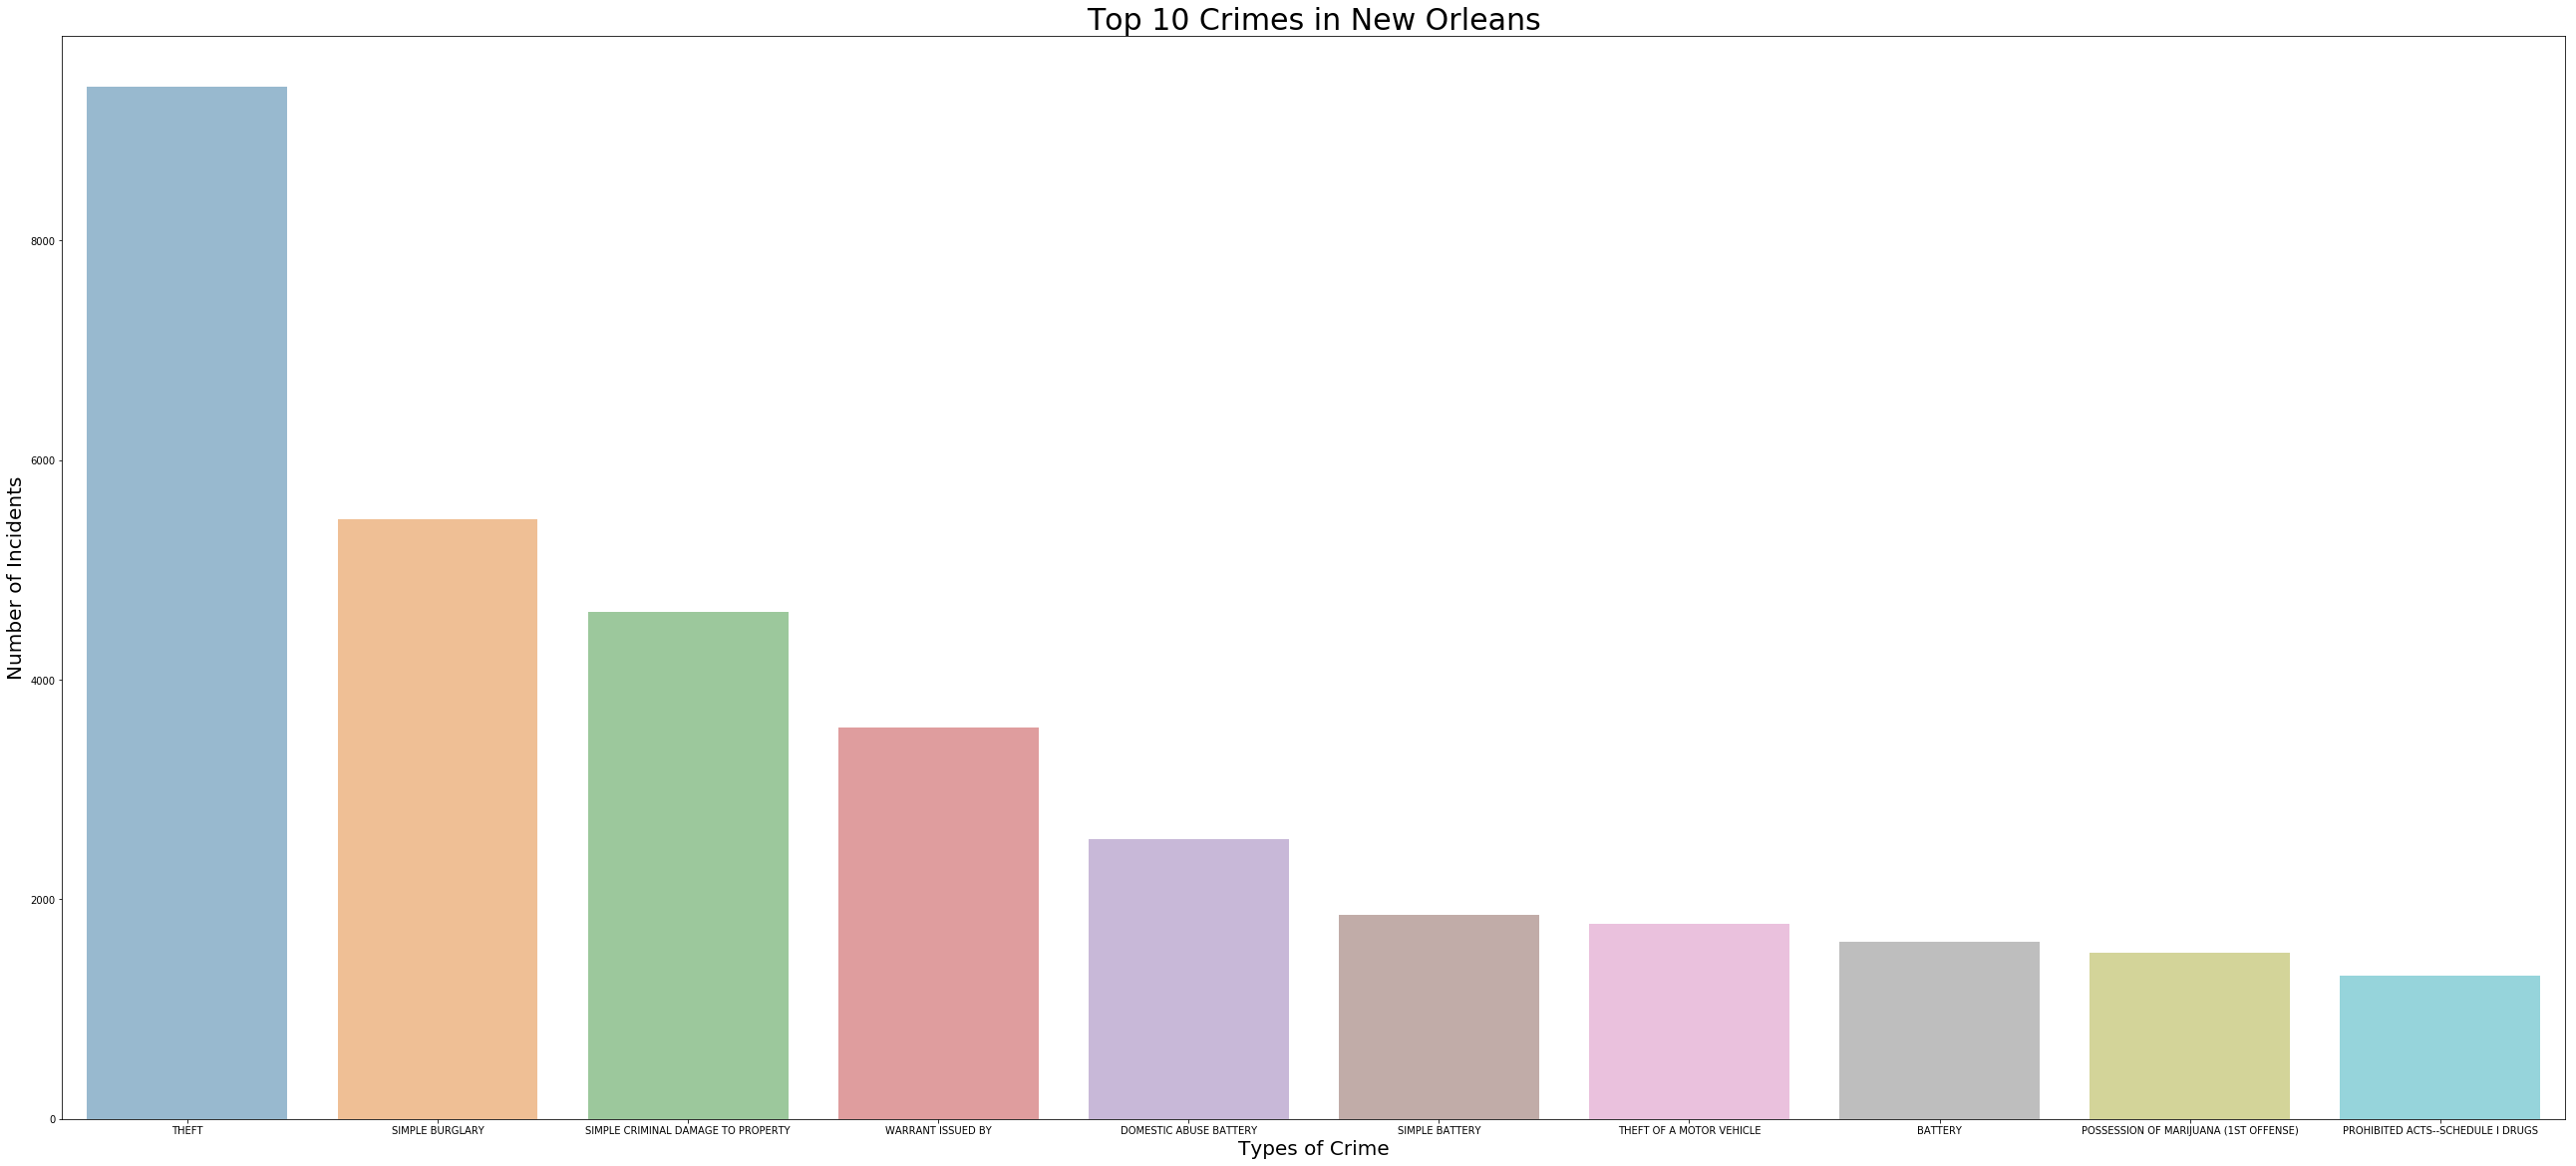

In [14]:
crime_count = df['Charge_Description'].value_counts()
crime_count = crime_count[:10,]
plt.figure(figsize = (45,20))
sns.barplot(crime_count.index, crime_count.values, alpha=0.5)

plt.title('Top 10 Crimes in New Orleans', fontsize= 30)
plt.ylabel('Number of Incidents', fontsize=20)
plt.xlabel('Types of Crime', fontsize = 20)

plt.rcParams["axes.labelsize"] = 18

plt.show()

In [15]:
df.drop(['Occurred_Date_Time'], axis=1, inplace=True)

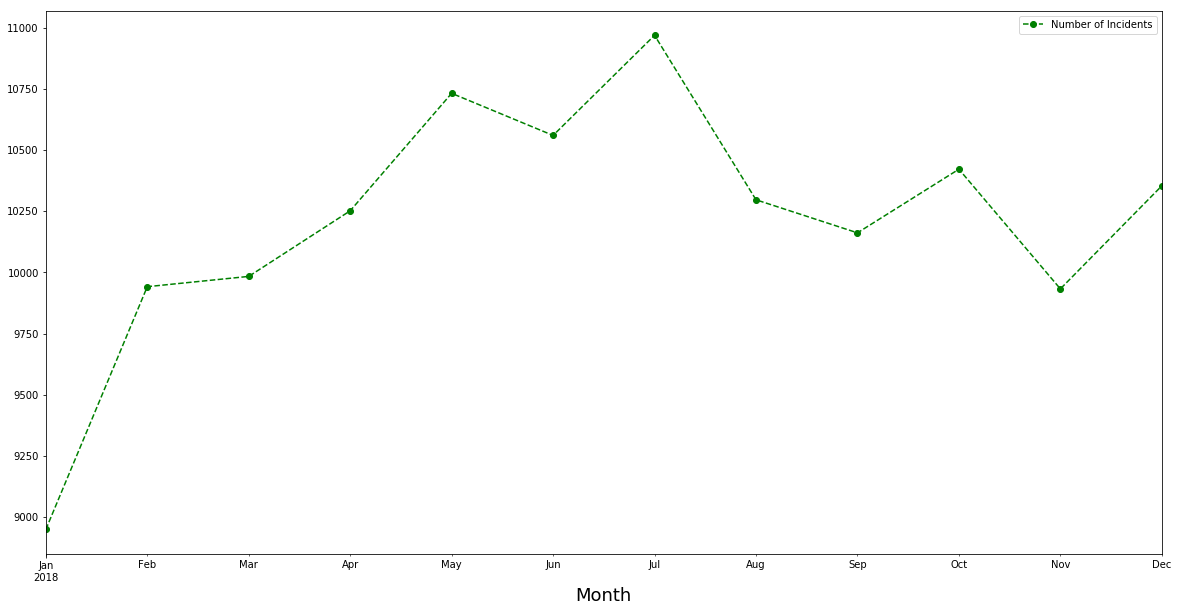

In [16]:
Plot = df.groupby('Month').size().reset_index(name='Number of Incidents').set_index('Month')
Plot.plot(kind="line", figsize=(20,10), marker='o', linestyle='--', color='green')

November was a month with the least amount of crimes and July was the month with the most crimes 

* 1st District – Tremé, Mid-City
* 2nd District – Uptown, Carrollton
* 3rd District – Gentilly, Lakeview, Westend
* 4th District – Algiers, English Turn
* 5th District – 7th Ward, 8th Ward, 9th Ward, Bywater, Desire
* 6th District – Irish Channel, Central City, Garden District
* 7th District – New Orleans East
* 8th District – French Quarter, Central Business Dist. (CBD), Warehouse District, Marigny Triangle

In [17]:
df['District'] = df['District'].astype('str')

df['District'].replace(to_replace=['1'], value=['Tremé/Mid-City'], inplace=True)
df['District'].replace(to_replace=['2'], value=['Uptown/Carrollton'], inplace=True)
df['District'].replace(to_replace=['3'], value=['Gentilly/Lakeview/Westend'], inplace=True)
df['District'].replace(to_replace=['4'], value=['Algiers/English Turn'], inplace=True)
df['District'].replace(to_replace=['5'], value=['7th Ward/8th Ward/9th Ward/Bywater/Desire'], inplace=True)
df['District'].replace(to_replace=['6'], value=['Irish Channel/Central City/Garden District'], inplace=True)
df['District'].replace(to_replace=['7'], value=['New Orleans East'], inplace=True)
df['District'].replace(to_replace=['8'], value=['French Quarter/Central Business District/Warehouse District/Marigny Triangle'],
                       inplace=True)

In [18]:
df['District'].head()

0                                     New Orleans East
1    French Quarter/Central Business District/Wareh...
2    French Quarter/Central Business District/Wareh...
3                                       Tremé/Mid-City
4    French Quarter/Central Business District/Wareh...
Name: District, dtype: object

In [19]:
Count_per_district = df.groupby(['District']).size().reset_index(name='Counts').sort_values('Counts',ascending=False)
Result = Count_per_district.head(10)
Result

,District,Counts
5,New Orleans East,21130
0,7th Ward/8th Ward/9th Ward/Bywater/Desire,17691
2,French Quarter/Central Business District/Wareh...,17569
4,Irish Channel/Central City/Garden District,14935
3,Gentilly/Lakeview/Westend,13715
1,Algiers/English Turn,13504
6,Tremé/Mid-City,12043
7,Uptown/Carrollton,11970


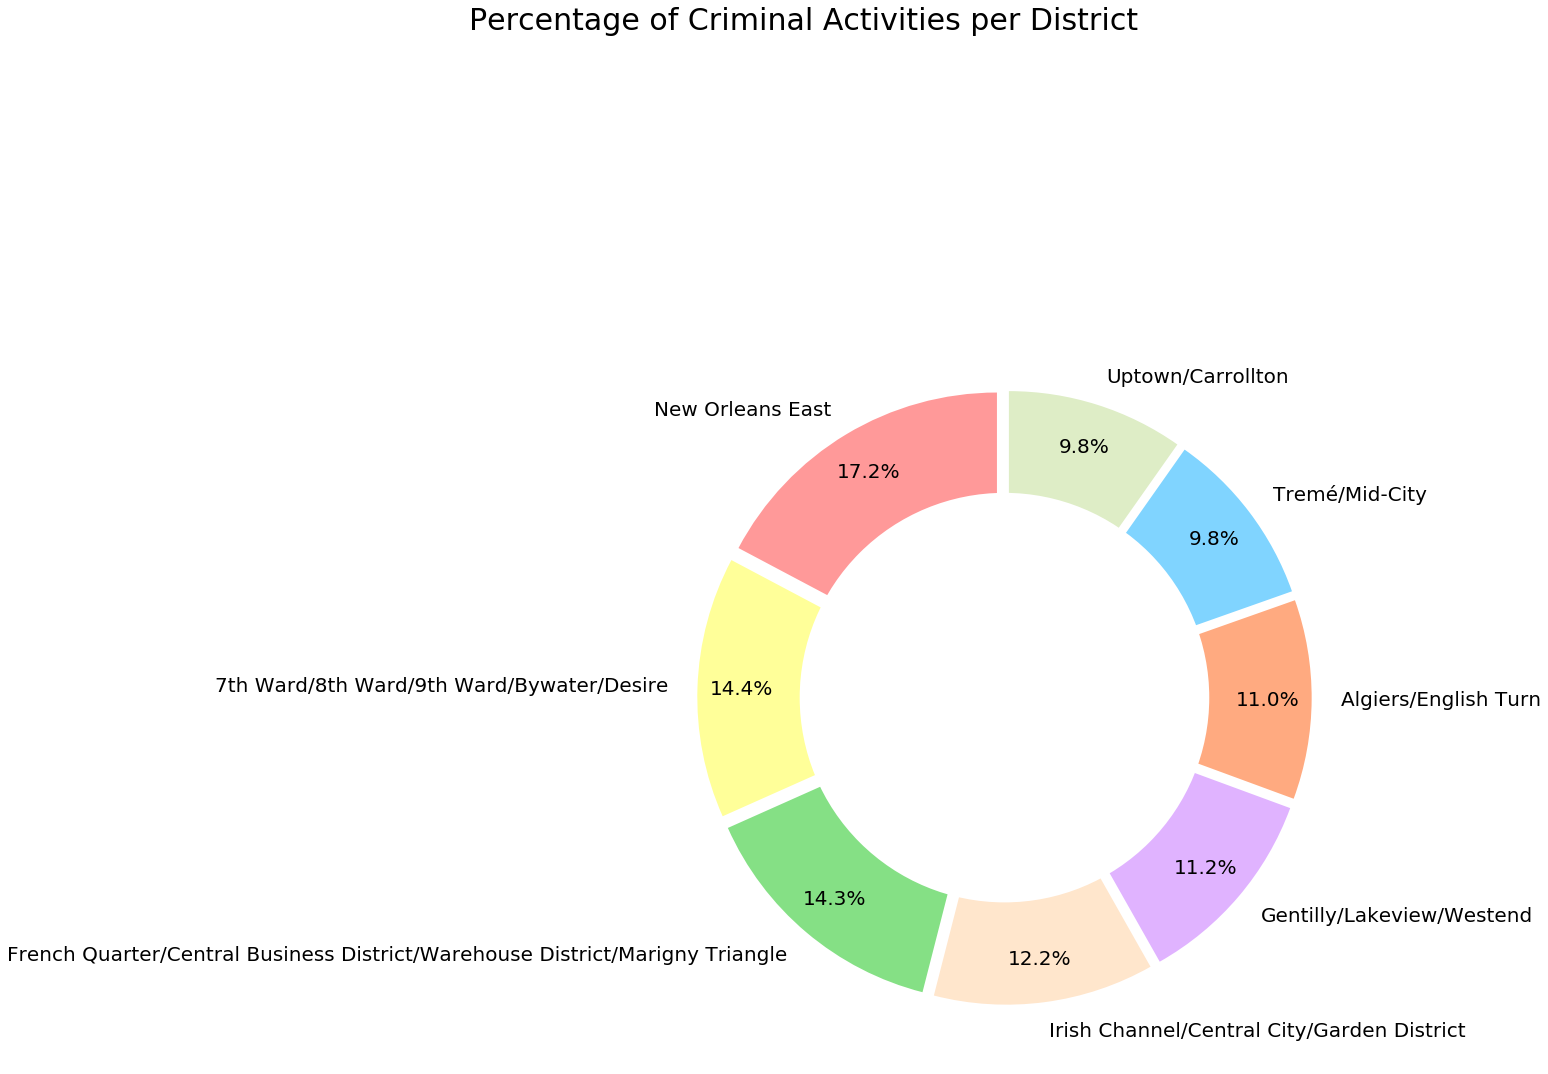

In [22]:
labels = Result['District']
values = Result['Counts']
colors = ['#ff9999','#ffff99','#85e085','#ffe6cc', '#e0b3ff', '#ffaa80', '#80d4ff', '#deedc6']
explode = (0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05)

plt.figure(figsize=(20,20))
plt.pie(values, colors = colors, labels=labels, autopct='%1.1f%%', shadow=False, pctdistance=0.85, startangle= 90,
        explode=explode, textprops={'fontsize': 20})

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

fig.suptitle('Percentage of Criminal Activities per District', fontsize=30)

plt.tight_layout()
plt.show()